In [1]:
import os
from modules.TCXFile import TCXFile
from collections import defaultdict

tcxdir = 'F:/jooks'

In [2]:
def default_value():
    return []

categories = defaultdict(default_value)

for file in os.listdir(tcxdir):
    tcx = TCXFile(os.path.join(tcxdir, file))
    activities = tcx.get_activies()
    sport = ""
    if 'walk' in activities[0].sport.lower():
        sport = 'walk'
    elif 'run' in activities[0].sport.lower():
        sport = 'run'
    else:
        sport = activities[0].sport.lower()
    
    distance = sum([x.distancemeters for x in activities])
    timeelapsed = sum([x.totaltimeseconds for x in activities])

    categories[sport].append((distance, timeelapsed, int(activities[0].id[:4])))

In [12]:
for category in categories.keys():
    distances, times, _ = zip(*categories[category])
    print(f'{category}: {sum(times)/60.0:.1f} minutes : {sum(distances)/1000.0:.1f} kilometers')

walk: 282224.4 minutes : 3403.9 kilometers
biking: 1367.0 minutes : 129.5 kilometers
run: 17348.9 minutes : 3010.0 kilometers
hiking: 264.4 minutes : 24.6 kilometers
skiing.cross_country: 105.8 minutes : 12.9 kilometers


In [5]:
import matplotlib.pyplot as pyplot

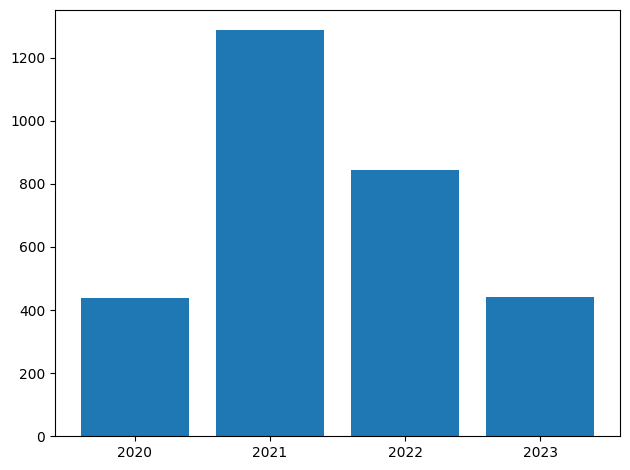

In [6]:
years = []
distances = []

for distance, time, year in categories['run']:
    if str(year) not in years:
        years.append(str(year))
        distances.append(distance/1000.0)
    else:
        distances[-1] += distance/1000.0

pyplot.bar(years, distances)
pyplot.tight_layout()
pyplot.show()